# Linear Regression Model

## import libs

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

## read data base

In [5]:
## grid sampling 1296
data1296 = pd.read_csv('CLEANED_gridsearch_1296.csv')
data1296 = data1296.drop(data1296.columns[0], axis=1)
X_1296 = data1296.drop('density', axis=1)
Y_1296 = data1296['density']
#print(f'{data1296}')
#print(f'{X_1296}')
#print(f'{Y_1296}')

## grid sampling 2401
data2401 = pd.read_csv('CLEANED_gridsearch_2401.csv')
data2401 = data2401.drop(data2401.columns[0], axis=1)
X_2401 = data2401.drop('density', axis=1)
Y_2401 = data2401['density']
#print(f'{data2401}')
#print(f'{X_2401}')
#print(f'{Y_2401}')

## sobol2 sampling
data_sobol1 = pd.read_csv('CLEANED_sobolsampling-2048.csv')
data_sobol1 = data_sobol1.drop(data_sobol1.columns[0], axis=1)
X_sobol1 = data_sobol1.drop('density', axis=1)
Y_sobol1 = data_sobol1['density']
#print(f'{data_sobol1}')
#print(f'{X_sobol1}')
#print(f'{Y_sobol1}')

## sobol2 sampling
data_sobol2 = pd.read_csv('CLEANED_sobolsampling-2048-2.csv')
data_sobol2 = data_sobol2.drop(data_sobol2.columns[0], axis=1)
X_sobol2 = data_sobol2.drop('density', axis=1)
Y_sobol2 = data_sobol2['density']
#print(f'{data_sobol2}')
#print(f'{X_sobol2}')
#print(f'{Y_sobol2}')

In [7]:
random_ints = [46, 40, 23, 29, 14, 78, 55, 33, 1, 61, 62, 39, 9, 25, 96, 95, 28, 27, 51, 0, 4, 39, 12, 41, 94, 70, 50, 18, 77, 37]
#print(f'{np.sort(random_ints)}')

## prepare data

In [8]:
## grid sampling 1296
X_TRAINs1296 = []
X_TESTs1296 = []
Y_TRAINs1296 = []
Y_TESTs1296 = []

## grid sampling 2401
X_TRAINs2401 = []
X_TESTs2401 = []
Y_TRAINs2401 = []
Y_TESTs2401 = []

## sobol sampling 1
X_TRAINsSobol1 = []
X_TESTsSobol1 = []
Y_TRAINsSobol1 = []
Y_TESTsSobol1 = []

## sobol sampling 2
X_TRAINsSobol2 = []
X_TESTsSobol2 = []
Y_TRAINsSobol2 = []
Y_TESTsSobol2 = []

for i in random_ints:
    #print(f'{i}')
    ## use the X_test, Y_test data for testing combined with all the data of the other datasets
    X_train, X_test, Y_train, Y_test = train_test_split(X_1296, Y_1296, test_size=0.05, random_state=i)
    X_TRAINs1296.append(X_train)
    Y_TRAINs1296.append(Y_train)
    #print(f'{X_test}')
    #print(f'{Y_test}')
    X_test = pd.concat([X_test, X_2401, X_sobol1, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_2401, Y_sobol1, Y_sobol2], ignore_index=True)
    X_TESTs1296.append(X_test)
    Y_TESTs1296.append(Y_test)
    #print(f'{X_test}')
    #print(f'{Y_test}')

    
    X_train, X_test, Y_train, Y_test = train_test_split(X_2401, Y_2401, test_size=0.05, random_state=i)
    X_TRAINs2401.append(X_train),
    Y_TRAINs2401.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_sobol1, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_sobol1, Y_sobol2], ignore_index=True)
    X_TESTs2401.append(X_test)
    Y_TESTs2401.append(Y_test)

    
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol1, Y_sobol1, test_size=0.05, random_state=i)
    X_TRAINsSobol1.append(X_train)
    Y_TRAINsSobol1.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_2401, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol2], ignore_index=True)
    X_TESTsSobol1.append(X_test)
    Y_TESTsSobol1.append(Y_test)

    
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol2, Y_sobol2, test_size=0.05, random_state=i)
    X_TRAINsSobol2.append(X_train)
    Y_TRAINsSobol2.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_2401, X_sobol1], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol1], ignore_index=True)
    X_TESTsSobol2.append(X_test)
    Y_TESTsSobol2.append(Y_test)

## create and train the model

In [12]:
## grid sampling 1296
MODELs1296 = []
Y_PREDICTIONs1296 = []
RMSEs1296 = []
R2s1296 = []
SPEARMANRs1296 = []

## grid sampling 2401
MODELs2401 = []
Y_PREDICTIONs2401 = []
RMSEs2401 = []
R2s2401 = []
SPEARMANRs2401 = []

## sobol sampling 1
MODELsSobol1 = []
Y_PREDICTIONsSobol1 = []
RMSEsSobol1 = []
R2sSobol1 = []
SPEARMANRsSobol1 = []

## sobol sampling 2
MODELsSobol2 = []
Y_PREDICTIONsSobol2 = []
RMSEsSobol2 = []
R2sSobol2 = []
SPEARMANRsSobol2 = []

for i in range(0, len(random_ints)):
    
    ## create the model
    model1296 = LinearRegression()
    #
    model2401 = LinearRegression()
    #
    modelSobol1 = LinearRegression()
    #
    modelSobol2 = LinearRegression()
    
    ## train/fit the model
    model1296.fit(X_TRAINs1296[i], Y_TRAINs1296[i])
    MODELs1296.append(model1296)
    #
    model2401.fit(X_TRAINs2401[i], Y_TRAINs2401[i])
    MODELs2401.append(model2401)
    #
    modelSobol1.fit(X_TRAINsSobol1[i], Y_TRAINsSobol1[i])
    MODELsSobol1.append(modelSobol1)
    #
    modelSobol2.fit(X_TRAINsSobol2[i], Y_TRAINsSobol2[i])
    MODELsSobol2.append(modelSobol2)
    
    ## prediction using the test set
    Y_prediction1296 = model1296.predict(X_TESTs1296[i])
    Y_PREDICTIONs1296.append(Y_prediction1296)
    #
    Y_prediction2401 = model2401.predict(X_TESTs2401[i])
    Y_PREDICTIONs2401.append(Y_prediction2401)
    #
    Y_predictionSobol1 = modelSobol1.predict(X_TESTsSobol1[i])
    Y_PREDICTIONsSobol1.append(Y_predictionSobol1)
    #
    Y_predictionSobol2 = modelSobol2.predict(X_TESTsSobol2[i])
    Y_PREDICTIONsSobol2.append(Y_predictionSobol2)
    
    ## evaluate with Y_test
    rmse1296 = np.sqrt(mean_squared_error(Y_TESTs1296[i], Y_prediction1296))
    r21296 = r2_score(Y_TESTs1296[i], Y_prediction1296)
    spearman_r1296 = stats.spearmanr(Y_TESTs1296[i], Y_prediction1296)
    RMSEs1296.append(rmse1296)
    R2s1296.append(r21296)
    SPEARMANRs1296.append(spearman_r1296.statistic)
    #
    rmse2401 = np.sqrt(mean_squared_error(Y_TESTs2401[i], Y_prediction2401))
    r22401 = r2_score(Y_TESTs2401[i], Y_prediction2401)
    spearman_r2401 = stats.spearmanr(Y_TESTs2401[i], Y_prediction2401)
    RMSEs2401.append(rmse2401)
    R2s2401.append(r22401)
    SPEARMANRs2401.append(spearman_r2401.statistic)
    #
    rmseSobol1 = np.sqrt(mean_squared_error(Y_TESTsSobol1[i], Y_predictionSobol1))
    r2Sobol1 = r2_score(Y_TESTsSobol1[i], Y_predictionSobol1)
    spearman_rSobol1 = stats.spearmanr(Y_TESTsSobol1[i], Y_predictionSobol1)
    RMSEsSobol1.append(rmseSobol1)
    R2sSobol1.append(r2Sobol1)
    SPEARMANRsSobol1.append(spearman_rSobol1.statistic)
    #
    rmseSobol2 = np.sqrt(mean_squared_error(Y_TESTsSobol2[i], Y_predictionSobol2))
    r2Sobol2 = r2_score(Y_TESTsSobol2[i], Y_predictionSobol2)
    spearman_rSobol2 = stats.spearmanr(Y_TESTsSobol2[i], Y_predictionSobol2)
    RMSEsSobol2.append(rmseSobol2)
    R2sSobol2.append(r2Sobol2)
    SPEARMANRsSobol2.append(spearman_rSobol2.statistic)

## plot RMSE and R2

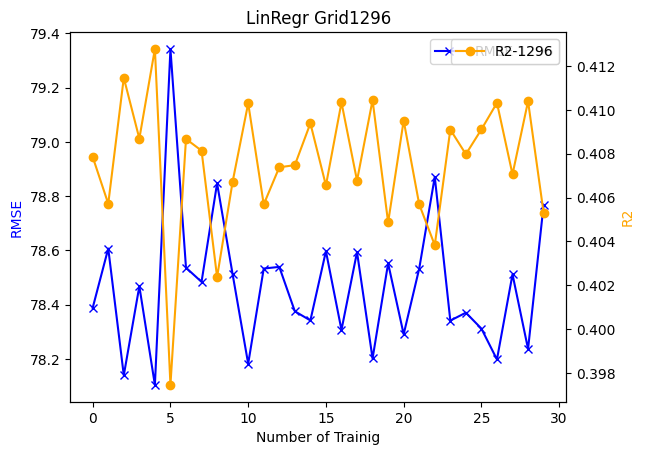

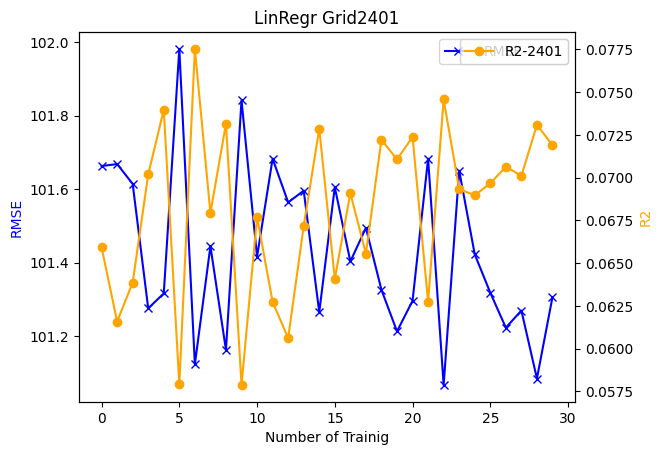

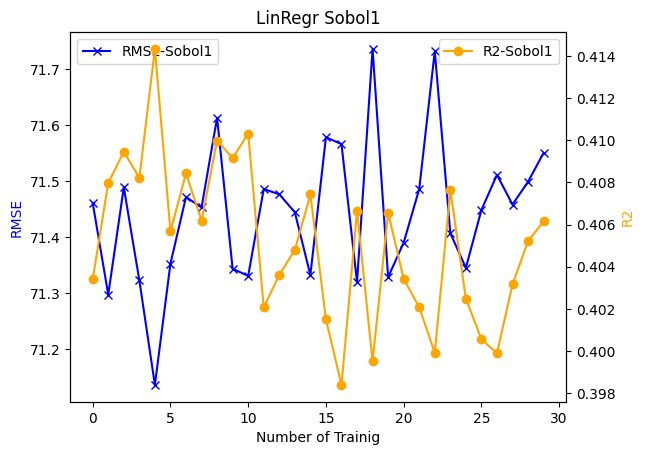

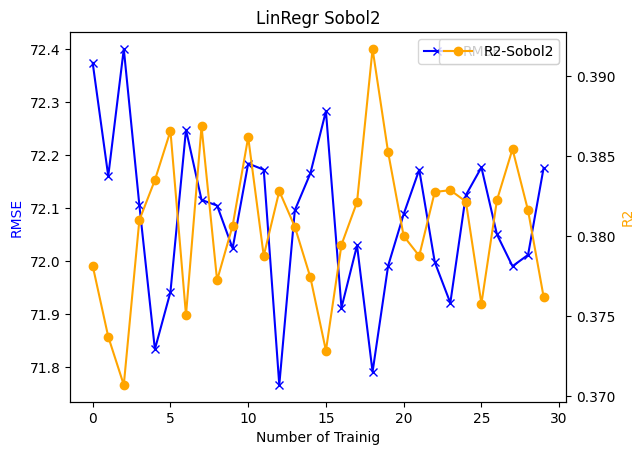

In [16]:
## Grid Sampling 1296
fig, ax1 = plt.subplots()
ax1.plot(RMSEs1296, '-x', color='blue', label='RMSE-1296')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()
plt.title('LinRegr Grid1296')

ax2 = ax1.twinx()
ax2.plot(R2s1296, '-o', color='orange', label='R2-1296')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('LinRegr_GRID1296-Training_with_different_randomseeds_for_data_splits.png')


## Grid Sampling 2401
fig, ax1 = plt.subplots()
ax1.plot(RMSEs2401, '-x', color='blue', label='RMSE-2401')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()
plt.title('LinRegr Grid2401')

ax2 = ax1.twinx()
ax2.plot(R2s2401, '-o', color='orange', label='R2-2401')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('LinRegr_GRID2401-Training_with_different_randomseeds_for_data_splits.png')


 ## Sobol Sampling 1
fig, ax1 = plt.subplots()
ax1.plot(RMSEsSobol1, '-x', color='blue', label='RMSE-Sobol1')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()
plt.title('LinRegr Sobol1')


ax2 = ax1.twinx()
ax2.plot(R2sSobol1, '-o', color='orange', label='R2-Sobol1')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('LinRegr_Sobol1-Training_with_different_randomseeds_for_data_splits.png')


## Sobol Sampling 2
fig, ax1 = plt.subplots()
ax1.plot(RMSEsSobol2, '-x', color='blue', label='RMSE-Sobol2')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()
plt.title('LinRegr Sobol2')

ax2 = ax1.twinx()
ax2.plot(R2sSobol2, '-o', color='orange', label='R2-Sobol2')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('LinRegr_Sobol2-Training_with_different_randomseeds_for_data_splits.png')

In [17]:
## Grid Sample 1296
print(f'GRID SAMPLE 1296')
print(f'avg. RMSE: {np.mean(RMSEs1296)}')
print(f'Std Dev: {np.std(RMSEs1296)}')
#print(f'Variance: {np.var(RMSEs1296)}')
print(f'avg. R2: {np.mean(R2s1296)}')
print(f'Std Dev: {np.std(R2s1296)}')
#print(f'Variance: {np.var(R2s1296)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRs1296)}')
print(f'Std Dev: {np.std(SPEARMANRs1296)}')

print(f'\nGRID SAMPLE 2401')
print(f'avg. RMSE: {np.mean(RMSEs2401)}')
print(f'Std Dev: {np.std(RMSEs2401)}')
#print(f'Variance: {np.var(RMSEs2401)}')
print(f'avg. R2: {np.mean(R2s2401)}')
print(f'Std Dev: {np.std(R2s2401)}')
#print(f'Variance: {np.var(R2s2401)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRs2401)}')
print(f'Std Dev: {np.std(SPEARMANRs2401)}')

print(f'\nSobol Sampling 1')
print(f'avg. RMSE: {np.mean(RMSEsSobol1)}')
print(f'Std Dev: {np.std(RMSEsSobol1)}')
#print(f'Variance: {np.var(RMSEsSobol1)}')
print(f'avg. R2: {np.mean(R2sSobol1)}')
print(f'Std Dev: {np.std(R2sSobol1)}')
#print(f'Variance: {np.var(R2sSobol)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRsSobol1)}')
print(f'Std Dev: {np.std(SPEARMANRsSobol1)}')

print(f'\nSobol Sampling 2')
print(f'avg. RMSE: {np.mean(RMSEsSobol2)}')
print(f'Std Dev: {np.std(RMSEsSobol2)}')
#print(f'Variance: {np.var(RMSEsSobol1)}')
print(f'avg. R2: {np.mean(R2sSobol2)}')
print(f'Std Dev: {np.std(R2sSobol2)}')
#print(f'Variance: {np.var(R2sSobol)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRsSobol2)}')
print(f'Std Dev: {np.std(SPEARMANRsSobol2)}')

GRID SAMPLE 1296
avg. RMSE: 78.46946976665701
Std Dev: 0.25156301350626176
avg. R2: 0.40758095021996726
Std Dev: 0.0029709900274561677
avg. SpearmanR: 0.7137306351552896
Std Dev: 0.0007072484059242657

GRID SAMPLE 2401
avg. RMSE: 101.43248780697174
Std Dev: 0.22588553776409254
avg. R2: 0.0682123301605818
Std Dev: 0.004925405971019182
avg. SpearmanR: 0.5776790877778222
Std Dev: 0.0021041545534082945

Sobol Sampling 1
avg. RMSE: 71.44540692069394
Std Dev: 0.12592979187670567
avg. R2: 0.40513933441443417
Std Dev: 0.0037426022978843316
avg. SpearmanR: 0.6179395327153425
Std Dev: 0.002533270868097601

Sobol Sampling 2
avg. RMSE: 72.08074088274383
Std Dev: 0.14966828926646727
avg. R2: 0.3806328444348214
Std Dev: 0.004549646882779139
avg. SpearmanR: 0.5862151435541227
Std Dev: 0.0035991568231938365


In [18]:
## Grid Sample 1296
print(f'GRID SAMPLE 1296')
i = RMSEs1296.index(np.min(RMSEs1296))
print(f'best RMSE: {RMSEs1296[i]}')
print(f'corresp. R2: {R2s1296[i]}')
print(f'corresp. SpearmanR: {SPEARMANRs1296[i]}\n')

## Grid Sample 2401
print(f'GRID SAMPLE 2401')
i = RMSEs2401.index(np.min(RMSEs2401))
print(f'best RMSE: {RMSEs2401[i]}')
print(f'corresp. R2: {R2s2401[i]}')
print(f'corresp. SpearmanR: {SPEARMANRs2401[i]}\n')

## Sobol 1
print(f'Sobol 1')
i = RMSEsSobol1.index(np.min(RMSEsSobol1))
#print(f'{RMSEsSobol1}')
print(f'best RMSE: {RMSEsSobol1[i]}')
print(f'corresp. R2: {R2sSobol1[i]}')
print(f'corresp. SpearmanR: {SPEARMANRsSobol1[i]}\n')

## Sobol 2
print(f'Sobol 2')
i = RMSEsSobol2.index(np.min(RMSEsSobol2))
print(f'best RMSE: {RMSEsSobol2[i]}')
print(f'corresp. R2: {R2sSobol2[i]}')
print(f'corresp. SpearmanR: {SPEARMANRsSobol2[i]}\n')

GRID SAMPLE 1296
best RMSE: 78.10423272644582
corresp. R2: 0.412780138392114
corresp. SpearmanR: 0.714326710045707

GRID SAMPLE 2401
best RMSE: 101.06693937894337
corresp. R2: 0.07457435020721903
corresp. SpearmanR: 0.581075899703022

Sobol 1
best RMSE: 71.13541973733604
corresp. R2: 0.4143298946535019
corresp. SpearmanR: 0.6228112540890399

Sobol 2
best RMSE: 71.76694210799329
corresp. R2: 0.3828338903367132
corresp. SpearmanR: 0.5905034543765283

